# IMPORTANDO Y CARGANDO LAS LIBRERIAS

---





In [1]:
#IMPORTAMOS LAS LIBRERIAS
import pandas as pd
import numpy as np

In [2]:
#OBTENEMOS LOS DATOS
data = pd.read_csv("Daily Bike Sharing.csv", 
                    index_col="dteday", 
                    parse_dates=True)
data.head()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
dteday,,,,,,,,,,,,,,,
2011-01-01,1,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
2011-01-02,2,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2011-01-03,3,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
2011-01-04,4,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
2011-01-05,5,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [3]:
#SELECCIONAMOS LAS VARIABLES QUE CREEMOS RELEVANTES PARA NUESTRO MODELO
dataset = data.loc[:, ["cnt", "holiday", "workingday", "weathersit",
                       "temp", "atemp", "hum", "windspeed"]]
dataset.head(1)

,cnt,holiday,workingday,weathersit,temp,atemp,hum,windspeed
dteday,,,,,,,,
2011-01-01,985,0,0,2,0.344167,0.363625,0.805833,0.160446


# TRANSFORMACIÓN DE LOS DATOS

In [4]:
#RENOMBRAMOS LA VARIABLE QUE QUEREMOS PRONOSTICAR
dataset = dataset.rename(columns = {'cnt' : 'y'})
dataset.head(1)

,y,holiday,workingday,weathersit,temp,atemp,hum,windspeed
dteday,,,,,,,,
2011-01-01,985,0,0,2,0.344167,0.363625,0.805833,0.160446


In [5]:
#index
dataset.index

DatetimeIndex(['2011-01-01', '2011-01-02', '2011-01-03', '2011-01-04',
               '2011-01-05', '2011-01-06', '2011-01-07', '2011-01-08',
               '2011-01-09', '2011-01-10',
               ...
               '2012-12-22', '2012-12-23', '2012-12-24', '2012-12-25',
               '2012-12-26', '2012-12-27', '2012-12-28', '2012-12-29',
               '2012-12-30', '2012-12-31'],
              dtype='datetime64[ns]', name='dteday', length=731, freq=None)

In [6]:
#Le decimos a python hey mi conjunto de datos es esta frecuencia diaria
# Esto es muy importante, cuando los modelos lean nuestra variable independiente, sabrán que hablamos de frecuencia diaria
dataset = dataset.asfreq("D")
dataset.index

DatetimeIndex(['2011-01-01', '2011-01-02', '2011-01-03', '2011-01-04',
               '2011-01-05', '2011-01-06', '2011-01-07', '2011-01-08',
               '2011-01-09', '2011-01-10',
               ...
               '2012-12-22', '2012-12-23', '2012-12-24', '2012-12-25',
               '2012-12-26', '2012-12-27', '2012-12-28', '2012-12-29',
               '2012-12-30', '2012-12-31'],
              dtype='datetime64[ns]', name='dteday', length=731, freq='D')

## VISUALIZACIÓN

<AxesSubplot: xlabel='dteday'>

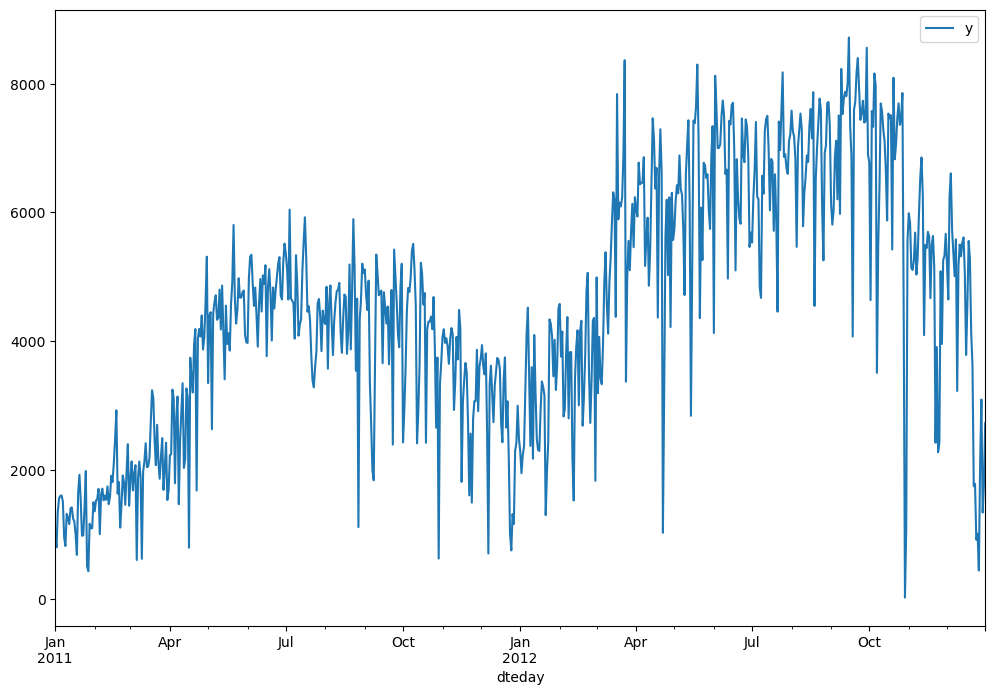

In [7]:
#Visualization
# podemos ver cierta estacionalidad (lo cual es algo que esperariamos en el alquiler de bicicletas), tambien podemos ver cierta tendencia creciente y el valor promedio aumenta con el tiempo.
# Otra cosa que podemos apreciar es la oscilacion tan grande en ciertos dias ej: de 4k a 8k
dataset["y"].plot(figsize = (12,8), legend = True)

## STATIONARITY

In [8]:
#Stationarity
from statsmodels.tsa.stattools import adfuller
stationarity = adfuller(dataset['y'])
print('Augmented Dickey Fuller p-value: %F' % stationarity[1])

Augmented Dickey Fuller p-value: 0.342743


## CONJUNTO DE ENTRENAMIENTO Y PRUEBAS

In [9]:
test_days = 31
training_set = dataset.iloc[:-test_days, :]
test_set = dataset.iloc[-test_days:, :]
test_set.tail(1)

,y,holiday,workingday,weathersit,temp,atemp,hum,windspeed
dteday,,,,,,,,
2012-12-31,2729,0,1,2,0.215833,0.223487,0.5775,0.154846


# SARIMAX

In [10]:
# exogenous_variables
train_exog = training_set.iloc[:,1:]
test_exog = test_set.iloc[:,1:]
test_exog.head()

,holiday,workingday,weathersit,temp,atemp,hum,windspeed
dteday,,,,,,,
2012-12-01,0,0,2,0.298333,0.316904,0.806667,0.059704
2012-12-02,0,0,2,0.347500,0.359208,0.823333,0.124379
2012-12-03,0,1,1,0.452500,0.455796,0.767500,0.082721
2012-12-04,0,1,1,0.475833,0.469054,0.733750,0.174129
2012-12-05,0,1,1,0.438333,0.428012,0.485000,0.324021


In [11]:
# Librerias
from pmdarima import auto_arima

In [12]:
# forescasting model
model = auto_arima(y = training_set['y'],
                   X = train_exog,
                   m = 7,
                   seasonal= True,
                   stepwise= False)

In [13]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  700
Model:               SARIMAX(0, 1, 3)   Log Likelihood               -5596.921
Date:                Sun, 08 Oct 2023   AIC                          11217.842
Time:                        02:52:20   BIC                          11272.438
Sample:                    01-01-2011   HQIC                         11238.948
                         - 11-30-2012                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      4.3506      5.560      0.782      0.434      -6.547      15.249
holiday     -240.3768    129.130     -1.862      0.063    -493.468      12.714
workingday    89.3491     60.535      1.476      0.140     -29.298     207.996
weathersit  -460.0478     51.313     -8.966      0.000    -560.618    -359.477
temp        3421.5401   1170.753      2.923      0.003    1126.907    5716.173
atemp       1970.5119   1197.354      1.646      0.100    -376.260    4317.283
hum        -2280.2912    198.544    -11.485      0.000   -2669.431   -1891.152
windspeed  -2275.6560    373.424     -6.094      0.000   -3007.554   -1543.757
ma.L1         -0.5548      0.028    -19.646      0.000      -0.610      -0.499
ma.L2         -0.1348      0.039     -3.423      0.001      -0.212      -0.058
ma.L3         -0.1442      0.040     -3.604      0.000      -0.223      -0.066
sigma2      5.263e+05   2.02e+04     26.103      0.000    4.87e+05    5.66e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):               624.00
Prob(Q):                              0.92   Prob(JB):                         0.00
Heteroskedasticity (H):               2.51   Skew:                            -0.92
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.25
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

parametros optimos para ...Model:	SARIMAX(0, 1, 3)
holiday	-240.3768
weathersit	-460.0478
hum	-2280.2912
son negativos, significa que el alquiler de bicicletas disminuiria
al contrario de ej:
temp	3421.5401	
workingday	89.3491 (la gente usa mas las bicicletas en los dias laborales)

In [32]:
# Predictions
predictions_sarimax =pd.Series(model.predict(n_periods= test_days,
                              X= test_exog)).rename("SARIMAX")
predictions_sarimax.index = test_set.index
predictions_sarimax

dteday
2012-12-01    4288.890069
2012-12-02    4216.960615
2012-12-03    5448.375761
2012-12-04    5427.632450
2012-12-05    5448.921386
2012-12-06    4779.755683
2012-12-07    4190.140870
2012-12-08    4177.501283
2012-12-09    4076.170868
2012-12-10    4317.932602
2012-12-11    4356.540785
2012-12-12    4524.924633
2012-12-13    5071.658346
2012-12-14    4766.975706
2012-12-15    4953.985400
2012-12-16    4274.933482
2012-12-17    4386.155818
2012-12-18    5195.537238
2012-12-19    4976.788577
2012-12-20    4519.429868
2012-12-21    4149.618589
2012-12-22    4375.321786
2012-12-23    4812.274711
2012-12-24    3893.088631
2012-12-25    3763.758838
2012-12-26    2789.267701
2012-12-27    3615.332658
2012-12-28    4259.252969
2012-12-29    3848.582756
2012-12-30    4400.038018
2012-12-31    4111.735656
Freq: D, Name: SARIMAX, dtype: float64

<AxesSubplot: xlabel='dteday'>

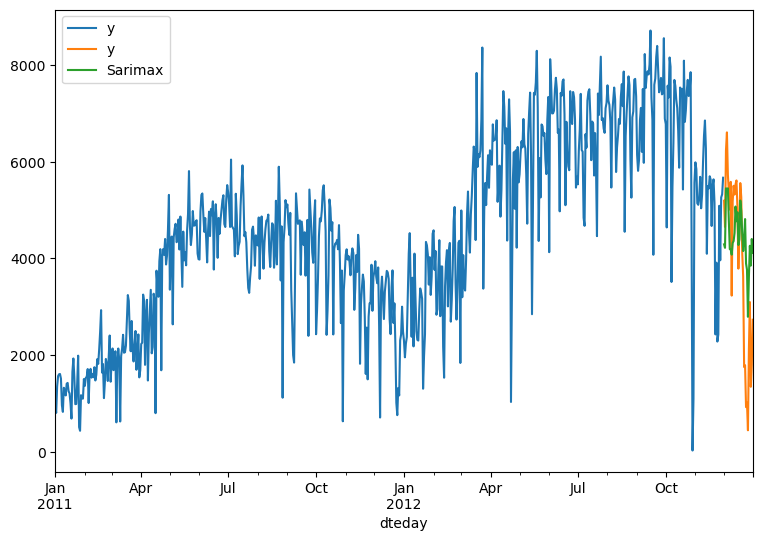

In [33]:
# visualization
training_set['y'].plot(figsize=(9,6),legend=True)
test_set['y'].plot(legend=True)
predictions_Sarimax.plot(legend = True)

<AxesSubplot: xlabel='dteday'>

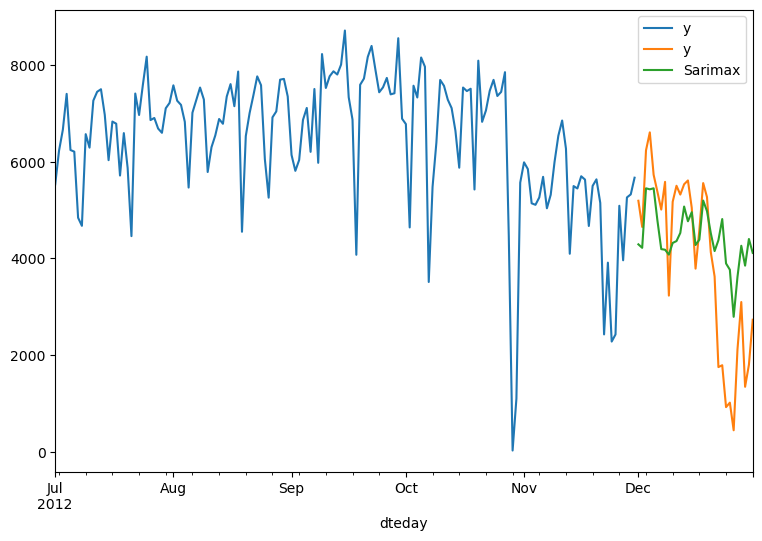

In [34]:
# visualization para los ultimos 6 meses
training_set['y']['2012-07-01':].plot(figsize=(9,6),legend=True)
test_set['y'].plot(legend=True)
predictions_Sarimax.plot(legend = True)

In [35]:
# MAE and RMSE
from sklearn.metrics import mean_absolute_error, mean_squared_error
print(round (mean_absolute_error(test_set['y'], predictions_sarimax),0))
print(round(np.sqrt(mean_squared_error(test_set['y'], predictions_sarimax)), 0))

1180.0
1480.0


es peor que tbats, pareceria mejor por el gráfico pero en realidad no lo es.

In [36]:
# MAPE function
def MAPE(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true-y_pred) / y_true)) * 100
MAPE(test_set['y'], predictions_sarimax)

71.27371258961108

# EXPORTAR PRONOSTICOS

In [37]:
%cd C:\Users\leoma\Desktop\projects\Modelos-de-Pronosticos-Series-Temporales-Python

C:\Users\leoma\Desktop\projects\Modelos-de-Pronosticos-Series-Temporales-Python


In [39]:
predictions_sarimax.to_csv('predictions_sarimax.csv', index=True)